In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon
from pylab import *

<a id='Indice'></a>
## Índice
[Inicio ▲](#Indice)

1. [Introducción](#Intro)
1. [Business understanding](#Business-understanding)
    1. [Modelo CRISP-DM](#CRISP-DM)
    1. [Tarea: como definir exito?](#TAREA1)
1. [Data understanding](#Data-understanding)
1. [Preparing the dataset](#Preparing-dateset)
    1. [Transformación de transfer fee](#Transformación-Transfer_fee)
    1. [Agregar exito](#Agregar-exito)
    1. [Limpiando el set](#Limpiando)
1. [Exploratory data analysis (EDA)](#Exploratory-data-analysis)
1. [EDA - Estadistica basica](#Estadistica-basica)
    1. [Tipos de datos](#Tipos-de-datos)
    1. [Promedio y mediana](#Promedio-mediana)
    1. [Variación y desviación estándar](#Variación-desviación_estándar)
    1. [Distribuciones comunes](#Distribuciones-comunes)
    1. [Covarianza y correlación](#Covarianza-correlación)
    1. [TAREA](#TAREA2)
1. [EDA - Visualizaciones](#Visualizaciones)
    1. [Primer paso](#Primer-paso)
    1. [Graficas](#Graficas)
    1. [TAREA](#TAREA3)
1. [Modelling](#Modelling)
    1. [Training and test dataset](#Training-test)
    1. [Modelo](#Modelo)
1. [Evaluación](#Evaluación)

<a id='Intro'></a>
# Introducción
[Inicio ▲](#Indice)

La idea de este notebook es para dar un ejemplo real de los pasos entre la aquicisión de los datos y el desarrollo de un modelo. En lo que sige, vamos a examinar un dataset cuál contiene datos sobre transfers de futbalistos de America del Sur hacia Europa entre 2009 y 2014. 

La idea es que primero obtenemos un primer entendimiento del dataset. Segundo, limpiamos el dataset y tercer vamos a examinar el dataset en profundidad. Haciendo eso, vamos a tocar a distintos terminos de estadistica y vamos a utilizar varios tipos de visualizaciones para realisar un Exploratory Data Analysis. 

In [67]:
# local
# df_futbol = pd.read_csv (r'Transfer_data.csv')

In [ ]:
# Github
# df_futbol = pd.read_csv (r'datasets/Transfer_data.csv')

In [ ]:
# Google Colab
# url = "https://raw.githubusercontent.com/efviodo/idatha-data-science-course/master/notebooks/datasets/Transfer_data.csv"
# df_futbol = pd.read_csv (url)

<a id='Business-understanding'></a>
# Business understanding
[Inicio ▲](#Indice)

No se puede subestimar la importancia del conocimiento del negocio en data science. Sin un buen conocimiento, siempre sera más dificil para armar el mejor modelo. Además, puede ser que se va a desarrollar modelos cuales son muy acuratos pero que no agregan nada de valor al negocio.

Por ejemplo, un club de futbol europeo, te da la oportunidad para ayudarle. Buscan un modelo para predecir o un jugador de America del Sur va a ser exitoso o no en Europa. La primera problema que surge es "Como definir exitoso?"

Hay varias formas para definir éxito, además la definición puede cambiarse según la posición de un jugador. Donde juzgan a un delantero por su goles, no es el caso para un defendor. 

#### Intenta para ti mismo dar una definición general para éxito.

<a id='Data-understanding'></a>
# Data understanding - básico
[Inicio ▲](#Indice)

Puede ser que en su definición de Exito utilizaste parámetros tal como "partidos jugados", "goles", ... Sin embargo, si nuestro dataset no contiene esos variables o si si contiene pero la calidad de la variable es muy pobre, no podemos utilizar esta definición. 

Por eso, el primer paso es para obtener un primer conocimiento muy basico del dataset por un par de funciones faciles.

In [68]:
df_futbol.shape

(200, 16)

In [69]:
list(df_futbol)

['Unnamed: 0',
 'Player_name',
 'Player_position',
 'Player_age',
 'Transfer_season',
 'Transfer_from_division',
 'Transfer_from_team',
 'Transfer_to_division',
 'Transfer_to_team',
 'Transfer_fee',
 'MV_transfer',
 'First_time_EU',
 'Loan_Transfer',
 'MV_4y_high',
 'Transfer_4y',
 'Transfer_after']

Aunque la significación de la mayoría de las variables son claras, algunas capaz no son. Por eso que les doy una descripción breva de todas las variables.

    * Unnamed 0                   : Nombre del jugador
    * Player_name                 : Nombre del jugador
    * Player_position             : Posición primera del jugador en la cancha
    * Player_age                  : Edad del jugador en el momento de su transfer
    * Transfer_season             : En que temporada realizó el transfer del jugador (de SA a EU)?
    * Transfer_from_division      : En que liga (en SA) estaba jugando antes su transfer?
    * Transfer_from_team          : En que club de futbol estaba jugando antes su transfer?
    * Transfer_to_division        : Hasta que liga (en EU) se transferó?
    * Transfer_to_team            : Hasta que club de futbol (en EU) se transferó?
    * Transfer_fee                : Premio del transfer
    * MV_Transfer                 : Valor de mercado del jugador al momento de su transfer.
    * First_time_EU               : Es la primera vez que el jugador juega en EU?
    * Loan_transfer               : El jugador fue alquilado en el año antes su transfer?
    * MV_4y_high                  : Valor de mercado más alto en 4 años después su transfer.
    * Transfer_4y                 : El jugador realizó otro transfer en 4 años después su transfer inicial?
    * Transfer_after              : Precio del transfer despúes el primer transfer. 

#### Ahora, mirando los distintos variables y sus valores, cambiarías algo en su definición? Agregarías algun otro variable?

### Definición sugerida
Nos ponemos en la mente del club. Primero que nada hay que entender que en 99% de los casos un club - o cualquier otra organización - implementa una sistema de machine learning con el objetivo de ganar plata. Por eso, que por la definición de éxito, tiene sentido tomar en cuenta la imagen financiera, como hecho en la definición abajo.

Un club compra un jugador para precio X. Si en 4 años, se pueden vender el jugador para mas plata o el jugador se queda al club pero con un valor cual es mayor al premio inicial, el transfer fue exitoso.

<a id='Preparing-dataset'></a>
# Preparing the dataset
[Inicio ▲](#Indice)

In [70]:
df_futbol

,Unnamed: 0,Player_name,Player_position,Player_age,Transfer_season,Transfer_from_division,Transfer_from_team,Transfer_to_division,Transfer_to_team,Transfer_fee,MV_transfer,First_time_EU,Loan_Transfer,MV_4y_high,Transfer_4y,Transfer_after
0,1,Adrián Luna,Right Winger,19,11/12,Primera División,Defensor,LaLiga,Espanyol,"1,00 Mill. €",275000.0,Yes,No,1000000.0,Yes,0.0
1,2,Adrián Ramos,Centre-Forward,23,09/10,Liga Águila II,CD América,Bundesliga,Hertha BSC,"2,00 Mill. €",1000000.0,Yes,No,6500000.0,No,NaN
2,3,Albano Bizzarri,Goalkeeper,35,13/14,Serie A,Lazio,Serie A,Genoa,300 Th. €,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Alejandro Alonso,Right Midfield,28,10/11,Ligue 1,Monaco,Ligue 1,Saint-Étienne,200 Th. €,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Alejandro González,Centre-Back,25,13/14,Primera División,Peñarol,Serie A,Hellas Verona,"2,40 Mill. €",850000.0,Yes,No,2000000.0,No,NaN
5,6,Alexis Rolín,Centre-Back,23,12/13,Primera División,Nacional,Serie A,Catania,"3,80 Mill. €",900000.0,Yes,No,3500000.0,Yes,1000000.0
6,7,Alexis Zapata,Attacking Midfield,18,13/14,Liga Águila II,Envigado,LaLiga,Granada CF,"1,18 Mill. €",NaN,Yes,No,700000.0,Yes,NaN
7,8,Allan,Central Midfield,21,12/13,Segunda División,Maldonado,LaLiga,Granada CF,"3,00 Mill. €",3000000.0,Yes,Yes,11500000.0,Yes,3000000.0
8,9,Álvaro González,Central Midfield,25,10/11,Primera División,Nacional,Serie A,Lazio,"2,00 Mill. €",800000.0,Yes,No,7500000.0,No,NaN
9,10,André Dias,Centre-Back,30,09/10,Série A,São Paulo,Serie A,Lazio,"2,50 Mill. €",NaN,NaN,NaN,NaN,NaN,NaN


Mirando el dataset vemos algo raro en la variable Transfer_fee no contiene valores numericos. Además, vemos que hay filas cuales refieren a "loan transfers" donde un club alquila un jugador pero no lo compra definitivamente. Borramos esas filas y después transformamos los valores a numericos.

## Borrar todos "loan transfers"

In [71]:
df_futbol = df_futbol[~df_futbol.Transfer_fee.str.contains("Loan")]

In [72]:
df_futbol.shape

(166, 16)

<a id='Transformación-Transfer_fee'></a>
## Transformación de transfer fee
[Inicio ▲](#Indice)

Hasta ahora, el premio del transfer o Transfer_fee, todavía no es un numéro. Por eso tenemos que transformarlo. Lo hacemos por los próximos pasos.

1) borrar el ,

2) cambiar Mill por 0000 (porque ya contiene dos ceros)

3) Cambiar TH. por 000

4) Cortar hasta el ultimo numero

5) Transformar el tipo de valor, de character a numeric

In [73]:
df_futbol['Transfer_fee'] = df_futbol['Transfer_fee'].apply(lambda x: x.replace(",",""))

/home/manu/.pyenv/versions/jupyter369/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [74]:
df_futbol['Transfer_fee'] = df_futbol['Transfer_fee'].apply(lambda x: x.replace(' Mill. €','0000'))

/home/manu/.pyenv/versions/jupyter369/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [75]:
df_futbol['Transfer_fee'] = df_futbol['Transfer_fee'].apply(lambda x: x.replace(' Th. €','000'))

/home/manu/.pyenv/versions/jupyter369/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [76]:
df_futbol['Transfer_fee'] = pd.to_numeric(df_futbol['Transfer_fee'])

/home/manu/.pyenv/versions/jupyter369/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [77]:
df_futbol.Transfer_fee.unique

<bound method Series.unique of 0       1000000
1       2000000
2        300000
3        200000
4       2400000
5       3800000
6       1180000
7       3000000
8       2000000
9       2500000
10      5500000
11       900000
12      1500000
13      1500000
14      1000000
15      2300000
16      1500000
17      3000000
19      1350000
20      6000000
21      4000000
23      2000000
24       100000
25      1300000
26      1900000
27      1730000
28       500000
29      2000000
30      3000000
32      1500000
         ...   
161      400000
162     2350000
163     4000000
166      950000
167     1400000
168     2500000
169    19730000
170    11900000
171     5000000
173      200000
174     5000000
175    10500000
176     4000000
177     4900000
179    10000000
180     2200000
181     1600000
183     1700000
184     8000000
185     2250000
186     3600000
188     2000000
190     2000000
191     3500000
193     5400000
194     4000000
195     7500000
196     3000000
198     4500000
199     4

In [78]:
df_futbol.head()

,Unnamed: 0,Player_name,Player_position,Player_age,Transfer_season,Transfer_from_division,Transfer_from_team,Transfer_to_division,Transfer_to_team,Transfer_fee,MV_transfer,First_time_EU,Loan_Transfer,MV_4y_high,Transfer_4y,Transfer_after
0,1,Adrián Luna,Right Winger,19,11/12,Primera División,Defensor,LaLiga,Espanyol,1000000,275000.0,Yes,No,1000000.0,Yes,0.0
1,2,Adrián Ramos,Centre-Forward,23,09/10,Liga Águila II,CD América,Bundesliga,Hertha BSC,2000000,1000000.0,Yes,No,6500000.0,No,NaN
2,3,Albano Bizzarri,Goalkeeper,35,13/14,Serie A,Lazio,Serie A,Genoa,300000,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Alejandro Alonso,Right Midfield,28,10/11,Ligue 1,Monaco,Ligue 1,Saint-Étienne,200000,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Alejandro González,Centre-Back,25,13/14,Primera División,Peñarol,Serie A,Hellas Verona,2400000,850000.0,Yes,No,2000000.0,No,NaN


<a id='Agregar-exito'></a>
## Agregar exito
[Inicio ▲](#Indice)

In [79]:
def decide_success(Transfer_fee, MV_4y_high, Transfer_4y, Transfer_after):
    if (Transfer_4y == "Yes") and (Transfer_after > Transfer_fee):
         return True
    elif (Transfer_4y == "No") and (MV_4y_high > Transfer_fee):
        return True
    elif pd.isna(Transfer_4y):
        return np.NaN
    elif  pd.isna(Transfer_fee):
        return np.NaN
    else:
        return False

In [80]:
df_futbol['succeeded'] = df_futbol.apply(lambda x: decide_success(x['Transfer_fee'],
                                                                x['MV_4y_high'],
                                                                x['Transfer_4y'],
                                                                x['Transfer_after']),
                                      axis=1)

/home/manu/.pyenv/versions/jupyter369/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [81]:
df_futbol['succeeded'].value_counts(dropna=False)

False    111
True      50
NaN        5
Name: succeeded, dtype: int64

<a id='Limpiando'></a>
## Limpiando el dataset
[Inicio ▲](#Indice)

Borrar filas donde succeeded es NA

In [82]:
df_futbol = df_futbol.dropna(subset=['succeeded'])

In [83]:
df_futbol['succeeded'].value_counts(dropna=False)

False    111
True      50
Name: succeeded, dtype: int64

<a id='Exploratory-data-analysis'></a>
# Exploratory data analysis (EDA)
[Inicio ▲](#Indice)

Un EDA es una etapa extremadamente importante en data science o en machine learning. A un alto nivel, EDA es el práctica de describir los datos por técnicas estadísticas y por visualización para extraer aspectos importantes y ocultos. 

En lo que sige vamos a ver primero un par de técnicas estadisticas basicas, como implementarlas en R y como nos informan sobre nuestro dataset. 

Segundo, vamos a ver varias tecnicas de visualización que ofrece R y como apliquarlas en nuestro dataset.

<a id='Estadistica-basica'></a>
# EDA - Estadistica basica
[Inicio ▲](#Indice)

En este parte vamos a examinar termos y medidas de la estadistica basica. Aunque parecen basicos, son muy importante y forman el baso de estadistica, data science y machine learning.

<a id='Tipos-de-datos'></a>
## Tipos de datos
[Inicio ▲](#Indice)

Hay 3 grandes tipos de datos:

### Numerical
Capaz es el tipo más común y en realidad es todo lo que es cuantificable, como por ejemplo: valor de un jugador o edad de un jugador.

En numerical hay dos grandes tipos sea:
#### Discreta
Discreta son datos cuales son basados en INTEGERS y asi tienen un limite de posibilidades. Por ejemplo: la cantidad de personas en este clase. Son 25 o 35 pero nunca puede ser 35,61. Ejemplo en nuestro dataset puede ser edad.

#### Continua
En continua, es distinto, no hay un limite. Cuanto tiempo va tomar este clase? No precisa ser 8 horas, puede ser 7h 56m 12s 88ms ... Ejemplo en nuestro dataset puede ser valor de un jugador.

### Categorical
Datos categoricales son datos cualitativos cuales NO tienen una significación matematical. Por ejemplo departementos en Uruguay. Yo vivo en Montevideo, alguien en Canelones, ... Igual podríamos asignar un numéro a todos los departementos pero no tiene significación matematical. Departemento 1 + departemento 4 no es igual a departemento 5. Otro ejemplo en nuestro dataset es la posición del jugador.

### Ordinal
Esta forma de datos es casí un mezcla de numerical y categorical. Este tiene una significación matematical. Por ejemplo el año del transfer. Se sabe que 2009 es menor o antes de 2011. Otro ejemplo son los ratings en YouTube con estrellas. 


<a id='Promedio-Mediana'></a>
## Promedio VS Mediana
[Inicio ▲](#Indice)

El promedio es el "average", la suma de todos los valores dividido por la cantidad de valores. En el caso de Valor promedio de jugadores sera algo tipo (100.000 + 2.000.000 + ... + 950.000) / (cantidad de jugadores).

En el caso de mediano, es en realidad el valor medio cuando ordenamos todos los valores de peaueño a mayor. El avantaje de la mediana es que NO es influenciado por outliers o valores extremos. Lo vemos abajo.

In [84]:
df_futbol["Transfer_fee"].mean()

4392391.304347826

In [85]:
df_futbol["Transfer_fee"].median()

2500000.0

Lo que pasó es que hay algun(es) transfers de muy alto valor. Pueden adivinar quien es?

<a id='Variación-desviación_estándar'></a>
## Variación y desviación estándar
[Inicio ▲](#Indice)

Basicamente son medidas de la propagación de una distribución de datos. En nuestro dataset hay premios de transfer entre gratis o cero y 80.000.000 cual parece mucho, pero es? En realidad vamos a mirar al promedio para decir o es mucho o no. Viendo que el promedio es 4.000.000, hay una propagación de 20 veces el promedio cual es bastante. En realidad así no calculamos la variación pero es una forma facíl para darles una idea.

La forma correcta para calcular la varianza es solo "el promedio de las diferencias al cuadrado del promedio del dataset". En este ejemplo sera [[(100.000 - 4712807)² + (2.000.000 - 4712807)² + ... + (950.000 - 4712807)²] / (cantidad de jugadores)].

Mientras que la desviación estándar es simplemente el raíz cuadrado de la varianza.

In [86]:
df_futbol["Transfer_fee"].var()

67736622527173.92

In [87]:
df_futbol["Transfer_fee"].std()

8230226.152857157

Vemos que la desviación estánder es mas pequeño pero también es más entendible. En este ejemplo es 8.125.501,80 y normalmente se dice que cualquier valor que es mas lejos del promedio que 1 desviación estándar es un outlier o valor extremo.

<a id='Distribuciones-comunes'></a>
## Distribuciones comunes
[Inicio ▲](#Indice)


Uniforme

Normal / Gaussian

Exponencial



### Distribución uniforme
En este tipo de distribución, hay una probabilidad plana y constante de que ocurra un valor dentro de un rango dado. La probabilidad que el valor es x o el valor es y es totalmente igual.

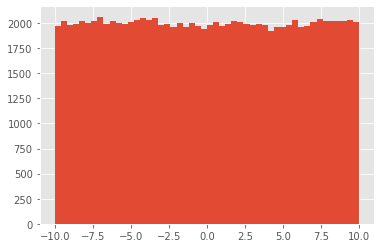

In [88]:
values = np.random.uniform(-10.0, 10.0, 100000)
plt.hist(values, 50)
plt.show()

### Distribución normal / Gaussian
Una distribución con una concentración sobre el promedio y con una propagación de su desviación estándar. Abajo vemos un ejemplo.

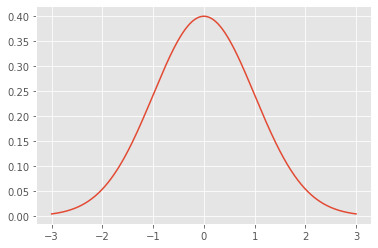

In [89]:
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)
plt.plot(x, norm.pdf(x))

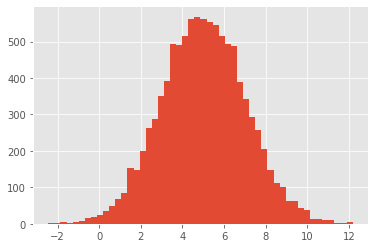

In [90]:
mu = 5.0
sigma = 2.0
values = np.random.normal(mu, sigma, 10000)
plt.hist(values, 50)
plt.show()

### Exponencial
La función de distribución de probabilidad exponencial es una distribución donde las cosas se caen de manera exponencial.

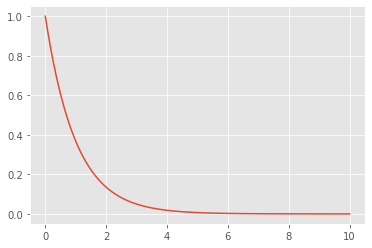

In [91]:
x = np.arange(0, 10, 0.001)
plt.plot(x, expon.pdf(x))

<a id='Covarianza-correlación'></a>
## Covarianza y correlación
[Inicio ▲](#Indice)

Estas son formas de medir si dos atributos diferentes están relacionados entre sí en un conjunto de datos. Eso es importantisimo para saber. Por ejemplo: hay una correlación entre mis gastos de publicidad y mis ventas? Si no hay, no te sirve invertir en publicidad. Y si hay, hasta que punta? Que relación hay entre los dos? Exponential? Linear?

La diferencia entre covarianza y correlación es que el valor de correlación siempre esta entre 0 - 1, mientras que el valor de covarianza es dependiente de la varianza, por eso que la correlación es más facíl para entender.   

In [92]:
def de_mean(x):
    xmean = mean(x)
    return [xi - xmean for xi in x]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

In [93]:
df_corr = df_futbol[np.isfinite(df_futbol['MV_transfer'])]

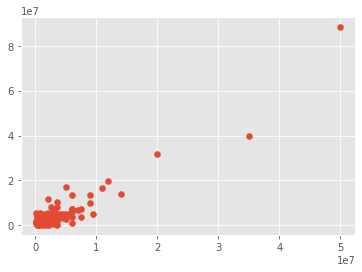

In [94]:
scatter(df_corr['MV_transfer'], df_corr['Transfer_fee'])

In [95]:
covariance(df_corr['MV_transfer'], df_corr['Transfer_fee'])

42178533029878.62

In [96]:
def correlation(x, y):
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x,y) / stddevx / stddevy  

correlation(df_corr['MV_transfer'], df_corr['Transfer_fee'])

0.9360930431227552

<a id='TAREA2'></a>
# TAREA: Estadistica basica + Business understanding
[Inicio ▲](#Indice)

#### 1. Que tipo de datos son los variables: Transfer_to_division, MV_transfer, Edad, Transfer_after?

#### 2. Calcula el promedio, mediana, varianza y desvación estandar de Transfer_fee y MV_4y_high

#### 3. Calcula la covarianza y correlacion entre Transfer_fee y MV_4y_high. Esperas que es mas alto o bajo de la correlacion entre Transfer_fee y MV_transfer? Que es y podes encontrar una explicación?

#### 4. Calcula el promedio y mediana de Transfer_fee y MV_4y_high por jugadores que son exitosos y por jugadores que no fueron exitosos. Hay una diferencia entre los dos datasets? Que significa eso? Hay una diferencia entre promedio y median, porque si o no?

#### 5. Compara la edad promedio y mediana entre el grupo de succeeded y non succeeded.

#### 6. Compara el promedio, mediana y desveción estandar de Transfer_after entre los dos grupos. Compara también con el MV_high que ya calculaste arriba.

#### 7. Compara el Transfer_fee promedio y mediana cual se paga en todos los distintos ligas de Europa. Hay una diferencia entre ellos? 

<a id='Visualización'></a>
# EDA - Visualización
[Inicio ▲](#Indice)

Técnicas de visualización tiene una grande importancia en el mundo de analíticas de (big) data. Nos da la oportunidad para dar conocimiento a miles de datos por resumirlos en una sola graphica. 

...

<a id='Primer-paso'></a>
## Primer paso
[Inicio ▲](#Indice)

Aunque parece muy o igual demasiado basico y se puede argumentar que no es necesariamente 'visual', la funcion 'summary' ofrece mucho valor. Da la posibilidad al usuario para ver un resumen de todos los variables facilmente en un tabla simple.

In [97]:
df_futbol.describe(include = "all")

,Unnamed: 0,Player_name,Player_position,Player_age,Transfer_season,Transfer_from_division,Transfer_from_team,Transfer_to_division,Transfer_to_team,Transfer_fee,MV_transfer,First_time_EU,Loan_Transfer,MV_4y_high,Transfer_4y,Transfer_after,succeeded
count,161.000000,161,161,161.000000,161,161,161,161,161,1.610000e+02,1.540000e+02,161,161,1.280000e+02,161,1.120000e+02,161
unique,NaN,154,12,NaN,5,9,65,5,66,NaN,NaN,2,3,NaN,3,NaN,2
top,NaN,Maicosuel,Centre-Back,NaN,10/11,Série A,Nacional,Serie A,Udinese Calcio,NaN,NaN,Yes,No,NaN,Yes,NaN,False
freq,NaN,4,33,NaN,36,45,9,78,11,NaN,NaN,124,133,NaN,131,NaN,111
mean,99.074534,NaN,NaN,22.726708,NaN,NaN,NaN,NaN,NaN,4.392391e+06,3.055519e+06,NaN,NaN,9.445312e+06,NaN,6.052411e+06,NaN
std,57.066250,NaN,NaN,3.166204,NaN,NaN,NaN,NaN,NaN,8.230226e+06,5.371147e+06,NaN,NaN,1.852205e+07,NaN,2.186103e+07,NaN
min,1.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,2.000000e+05,7.500000e+04,NaN,NaN,5.000000e+05,NaN,0.000000e+00,NaN
25%,51.000000,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,1.500000e+06,8.000000e+05,NaN,NaN,2.150000e+06,NaN,0.000000e+00,NaN
50%,99.000000,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,2.500000e+06,2.000000e+06,NaN,NaN,4.000000e+06,NaN,1.825000e+06,NaN
75%,150.000000,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,4.200000e+06,3.000000e+06,NaN,NaN,9.625000e+06,NaN,4.000000e+06,NaN


<a id='Graficas'></a>
## Graficas
[Inicio ▲](#Indice)

### Scatterplot
Para ser capaz de interpretar bien un scatterplot (o cualquier graphica), los limites de los axis son muy importante. En el ejemplo abajo vemos que la graphica incluye unos valores extremos. Igual, es bastante sencillo exlcuirlos de la graphica con ylim y xlim. Intentalo para ti mismo.

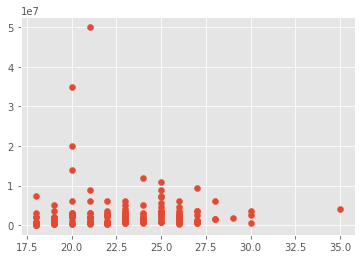

In [98]:
scatter(df_futbol.Player_age, df_futbol.MV_transfer)

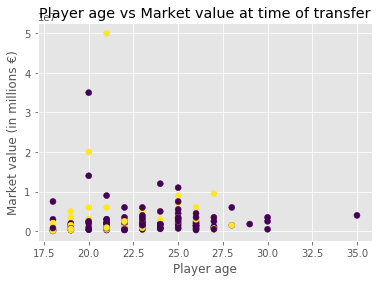

In [99]:
plt.scatter(df_futbol.Player_age, df_futbol.MV_transfer, c=df_futbol.succeeded)
plt.title("Player age vs Market value at time of transfer")
plt.xlabel("Player age")
plt.ylabel("Market value (in millions €)")
plt.show()

### Histogram
Un histograma o diagrama de columna es la representación gráfica de la distribución de frecuencia de datos agrupados en clases. En el ejemplo abajo, presentamos la cantidad de jugadores por posición. Igual vemos que no esta muy interpretable, sería mejor con menos grupos (como vamos a ver más abajo). 

Cuando utilizamos la función plot en R sobre un variable categorical, nos da un histogram. También podríamos utilizar plot(table(df$variable)). Table es la presentación non-grafica de un variable.

In [100]:
df_futbol.Player_position.value_counts()

Centre-Back           33
Centre-Forward        27
Central Midfield      16
Defensive Midfield    15
Left Winger           14
Attacking Midfield    13
Right-Back            11
Right Winger           9
Left-Back              8
Second Striker         6
Goalkeeper             5
Left Midfield          4
Name: Player_position, dtype: int64

Text(0, 0.5, 'Amount of players')

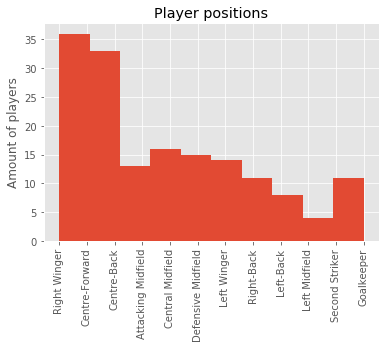

In [101]:
plt.style.use('ggplot')
plt.hist(df_futbol.Player_position)
plt.xticks(rotation='vertical')
plt.title("Player positions")
plt.ylabel("Amount of players")

### Diagrama de torta
Un gráfico circular es un gráfico estadístico circular, que se divide en sectores para ilustrar la proporción numérica. Abaja mostramos un ejemplo con la proporción de jugadores quienes van a las distintas divisiones en Europa.

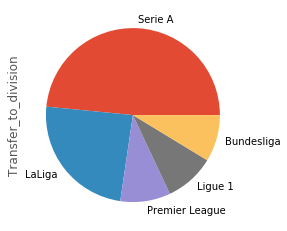

In [102]:
df_futbol.Transfer_to_division.value_counts().plot(kind='pie')

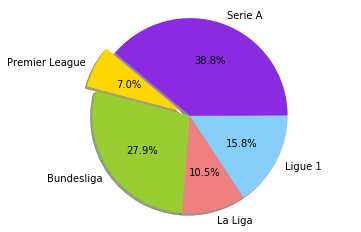

In [103]:
League_spendings = df_futbol.groupby('Transfer_to_division')['Transfer_fee'].sum()
labels = "Premier League", "Bundesliga", "La Liga", "Ligue 1", "Serie A"

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'blueviolet']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(League_spendings, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

### Gráfico de líneas
Un gráfico de líneas o un gráfico de líneas o un gráfico de líneas es un tipo de gráfico que muestra información como una serie o puntos de datos llamados 'marcadores' conectados por segmentos de línea.

En el ejemplo abajo, presentamos la evolución de gastos por transfer por temporada. Para mostrarlo, primero tenemos que calcularlo. Mostramos dos metodos. 

En el primer methodo, utilizamos un for loop para sumar todos los gastos por temporada. Aunque este methodo es perfectamente correcto, se puede hacerlo mucho mas eficiente como mostramos más abajo.

Transfer_season
09/10    117755000
10/11    112810000
11/12    116710000
12/13    173990000
13/14    185910000
Name: Transfer_fee, dtype: int64


Text(0.5, 0, 'Season')

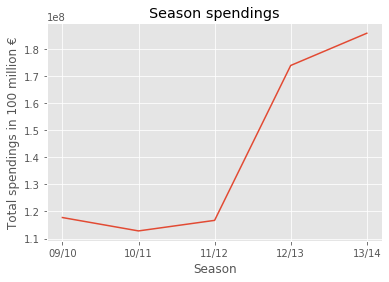

In [104]:
Season_spendings = df_futbol.groupby('Transfer_season')['Transfer_fee'].sum()
print(Season_spendings)

labels = ["09/10", "10/11", "11/12", "12/13", "13/14"]

plt.plot(labels, Season_spendings)
plt.title("Season spendings")
plt.ylabel("Total spendings in 100 million €")
plt.xlabel("Season")

### Boxplot

Un diagrama de caja es un resumen gráfico de una variable basada en la representación de cinco dígitos. Este resumen de cinco dígitos consta del mínimo, el primer cuartil, la mediana (o segundo cuartil), el tercer cuartil y el máximo de los datos observados.

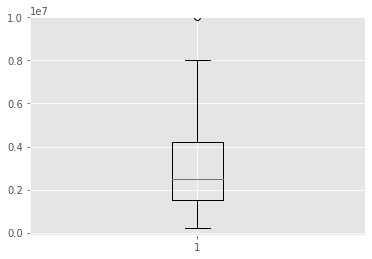

In [109]:
boxplot(df_futbol.Transfer_fee)
ymax = 10000000
ymin = -100000
plt.ylim(ymin, ymax)
plt.show()

### Stacked histogram

Un gráfico de barras apiladas es un gráfico que utiliza barras para mostrar comparaciones entre categorías de datos, pero con la capacidad de presentar otro variable en las barras. 

Abajo mostramos un histogram de las divisiones destinarios y aplicamos un color cual presenta la distribución de jugadores exitosos vs no-exitosos.

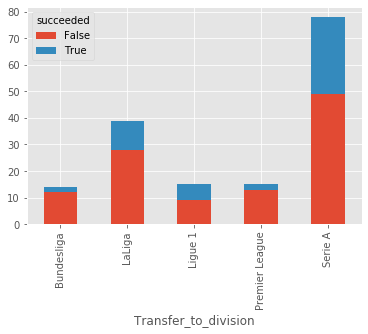

In [110]:
df2 = df_futbol.groupby(['Transfer_to_division', 'succeeded'])['Transfer_to_division'].count().unstack('succeeded').fillna(0)
df2.plot(kind='bar', stacked=True)

### Stacked area chart
Un gráfico de área apilada es la extensión de un gráfico de área básico para mostrar la evolución del valor de varios grupos en el mismo gráfico. Los valores de cada grupo se muestran uno encima del otro.

Abajo mostramos la evolución de gastos por año y además la distribución de gastos totales por división destinario.  

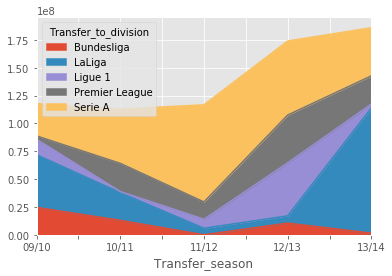

In [111]:
df2 = df_futbol.groupby(['Transfer_season', 'Transfer_to_division'])['Transfer_fee'].sum().unstack('Transfer_to_division').fillna(0)
df2.plot(kind='area', stacked=True)

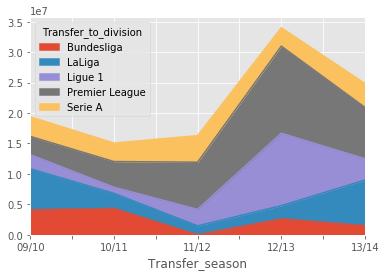

In [112]:
df2 = df_futbol.groupby(['Transfer_season', 'Transfer_to_division'])['Transfer_fee'].mean().unstack('Transfer_to_division').fillna(0)
df2.plot(kind='area', stacked=True)

<a id='TAREA3'></a>
# TAREA: Visualizaciónes + Data understanding
[Inicio ▲](#Indice)

### 1. En el summary vemos algunos nombres estan 4 veces en la lista. Como es posible? Investiga, verifica su hypothesis y borra filas duplicados si es necesario.

### 2. El histogram de distintas posiciones no nos da una vista muy clara. Arma un codigo para agregar un nuevo variable cual grupa las posiciones en 4 categorias. (Golero, Defensa, Media cancha, Adelante)

### 3. Visualiza su nuevo variable de posiciones en un histogram.

### 4.  Visualiza de nuevo la nueva variable, pero ahora implementa también que el color muestra la distribución de succeeded. Describe que se observa.

### 5. Arma otro stacked histogram, esta vez de las distintas divisiones y el color presentado las distintas posiciones.

### 6. Arma un stacked area chart, para los MV_4y_high por los distintas temporadas y por división. Describe lo que se observa. 

# SOLUCIONES: Estadistica basica + Business understanding
[Inicio ▲](#Indice)

#### 1. Que tipo de datos son los variables: Transfer_to_division, MV_transfer, Edad, Transfer_after?

Categorical, Numerical (continua), Numerical(discreto), Numerical (continua)

#### 2. Calcula el promedio, mediana, varianza y desvación estandar de Transfer_fee y MV_4y_high

In [208]:
mean_fee = df_futbol["Transfer_fee"].mean()
median_fee = df_futbol["Transfer_fee"].median()
var_fee = df_futbol["Transfer_fee"].var()
std_fee = df_futbol["Transfer_fee"].std()
print("mean equals", mean_fee,'\n' "median equals", median_fee, '\n' "variance equals", var_fee, '\n' "standard deviation equals", std_fee)

mean equals 4298644.578313253 
median equals 2500000.0 
variance equals 66023779515334.07 
standard deviation equals 8125501.800832615


In [25]:
df_MVhigh = df_futbol[np.isfinite(df_futbol['MV_4y_high'])]
mean_fee = df_MVhigh["MV_4y_high"].mean()
median_fee = df_MVhigh["MV_4y_high"].median()
var_fee = df_MVhigh["MV_4y_high"].var()
std_fee = df_MVhigh["MV_4y_high"].std()
print("mean equals", mean_fee,'\n' "median equals", median_fee, '\n' "variance equals", var_fee, '\n' "standard deviation equals", std_fee)

mean equals 9445312.5 
median equals 4000000.0 
variance equals 343066158956692.94 
standard deviation equals 18522045.215275038


#### 3. Calcula la covarianza y correlacion entre Transfer_fee y MV_4y_high. Esperas que es mas alto o bajo de la correlacion entre Transfer_fee y MV_transfer? Que es y podes encontrar una explicación?

In [29]:
cov_fee_MVhigh = covariance(df_MVhigh["Transfer_fee"], df_MVhigh["MV_4y_high"])
cor_fee_MVhigh = correlation(df_MVhigh["Transfer_fee"], df_MVhigh["MV_4y_high"])
print("covariance equals", cov_fee_MVhigh,'\n' "correlation equals", cor_fee_MVhigh)

covariance equals 143256044783464.56 
correlation equals 0.8499599079839167


La correlación entre Transfer_fee (precio del jugador) y MV_4y_high (valor mas alto del jugador en los 4 años enseguidos) es menor porque en 4 años muchas cosas pueden pasar. Un jugador se vuelve el mejor del mundo o no juega mas por leciones y entonces su valor cambia mucho de su precio inicial. Dicho eso, 0.85 aún es muy alto y muestra gran correlación.

#### 4. Calcula el promedio y mediana de Transfer_fee y MV_4y_high por jugadores que son exitosos y por jugadores que no fueron exitosos. Hay una diferencia entre los dos datasets? Que significa eso? Hay una diferencia entre promedio y median, porque si o no?

In [42]:
df_suc = df_futbol.drop(df_futbol[df_futbol.succeeded == False].index)
shape(df_suc)

(50, 17)

In [43]:
df_nosuc = df_futbol.drop(df_futbol[df_futbol.succeeded == True].index)
shape(df_nosuc)

(116, 17)

In [44]:
df_suc_MVhigh = df_suc[np.isfinite(df_suc['MV_4y_high'])]
df_nosuc_MVhigh = df_nosuc[np.isfinite(df_nosuc['MV_4y_high'])]

In [47]:
mean_MVh_succeeded = df_suc_MVhigh['MV_4y_high'].mean() 
median_MVh_succeeded = df_suc_MVhigh['MV_4y_high'].median()

mean_MVh_nosucceed = df_nosuc_MVhigh['MV_4y_high'].mean() 
median_MVh_nosucceed = df_nosuc_MVhigh['MV_4y_high'].median()

print("For succesful players the mean highest merket value is", mean_MVh_succeeded,'\n' "while the median equals", median_MVh_succeeded) 
print("For players that did not succeed, the mean highest merket value is", mean_MVh_nosucceed,'\n' "while the median equals", median_MVh_nosucceed)

For succesful players the mean highest merket value is 17904081.63265306 
while the median equals 10000000.0
For players that did not succeed, the mean highest merket value is 4198734.17721519 
while the median equals 3000000.0


In [48]:
mean_MVh_succeeded = df_suc_MVhigh['Transfer_fee'].mean() 
median_MVh_succeeded = df_suc_MVhigh['Transfer_fee'].median()

mean_MVh_nosucceed = df_nosuc_MVhigh['Transfer_fee'].mean() 
median_MVh_nosucceed = df_nosuc_MVhigh['Transfer_fee'].median()

print("For succesful players the mean Transfer price is", mean_MVh_succeeded,'\n' "while the median equals", median_MVh_succeeded) 
print("For players that did not succeed, the mean Transfer price is", mean_MVh_nosucceed,'\n' "while the median equals", median_MVh_nosucceed)

For succesful players the mean Transfer price is 6183061.224489796 
while the median equals 3000000.0
For players that did not succeed, the mean Transfer price is 3804936.7088607596 
while the median equals 2500000.0


Primera que nada observamos que el promedio y mediana del valor mas alto de jugadores exitosos es bastante mas alto que los no-exitosos, cual es muy logico, jugadores exitosos van a tener mejor valor que los non-exitosos.

Al otro lado, cuando ponemos foque en precio o transfer_fee, vemos que aunque vemos la misma tendencia, la diferencia es mucho más chico, lo que quiere decir que altos precios no necesariamente garantan jugadores exitos.

Por ultimo, vemos aue hay una grande diferencia entre los promedios y medianas. Eso tiene que ver con valores extremos, entonces nuestro dataset contiene bastante jugadores con un valor o precio muy alto comparado con el promedio.

#### 5. Compara la edad promedio y mediana entre el grupo de succeeded y non succeeded.

In [51]:
mean_suc_age = df_suc['Player_age'].mean()
median_suc_age = df_suc['Player_age'].median()

mean_nosuc_age = df_nosuc['Player_age'].mean()
median_nosuc_age = df_nosuc['Player_age'].median()

print("For succesful players the mean age is", mean_suc_age,'\n' "while the median equals", median_suc_age) 
print("For players that did not succeed, the mean age is", mean_nosuc_age,'\n' "while the median equals", median_nosuc_age)

For succesful players the mean age is 22.02 
while the median equals 22.0
For players that did not succeed, the mean age is 23.28448275862069 
while the median equals 23.0


La edad promedio/mediana de jugadores exitos es 22 mientras lo de jugadores no-exitosos es 23. Parece que jugadores jovenes tienen más probilidad de ser exitoso aunque un año no es una grande diferencia.

#### 6. Compara el promedio, mediana y desveción estandar de Transfer_after entre los dos grupos. Compara también con el MV_high que ya calculaste arriba.

In [55]:
df_sucTA = df_suc[np.isfinite(df_suc['Transfer_after'])]
df_nosucTA = df_nosuc[np.isfinite(df_nosuc['Transfer_after'])]

In [56]:
mean_sucTA = df_sucTA['Transfer_after'].mean()
median_sucTA = df_sucTA['Transfer_after'].median()
std_sucTA = df_sucTA['Transfer_after'].std()

print("For succesful players who got transferred in the 4 years after their initial transfer, the mean transfer fee price was", mean_sucTA, "whilst the median and the std were respectively", median_sucTA, "and", std_sucTA)

For succesful players who got transferred in the 4 years after their initial transfer, the mean transfer fee price was 16796363.636363637 whilst the median and the std were respectively 7000000.0 and 38367508.61879928


In [57]:
mean_nosucTA = df_nosucTA['Transfer_after'].mean()
median_nosucTA = df_nosucTA['Transfer_after'].median()
std_nosucTA = df_nosucTA['Transfer_after'].std()

print("For succesful players who got transferred in the 4 years after their initial transfer, the mean transfer fee price was", mean_nosucTA, "whilst the median and the std were respectively", median_nosucTA, "and", std_nosucTA)

For succesful players who got transferred in the 4 years after their initial transfer, the mean transfer fee price was 1564430.3797468354 whilst the median and the std were respectively 0.0 and 2633188.9347794103


Primero que nada, hay una tremenda diferencia entre los promedios/medianas del precio de nuevos transfers de jugadores exitos y no-exitosos, cual tiene sentido. 

Otra observación es que jugadores no-exitosos, estan vendido muchas veces gratis. Vemos eso porque la mediana es 0.

Además, vemos que el sd de exitosos es muy alto, cual indica que los precios de nuevos transfers varian mucho.

Por ultimo, cuando comparamos estas medidas con MV_4_high, vemos una tendencia igual, cual es bastante logico.

#### 7. Compara el Transfer_fee promedio y mediana cual se paga en todos los distintos ligas de Europa. Hay una diferencia entre ellos? 

In [63]:
df_futbol.groupby('Transfer_to_division')['Transfer_fee'].mean()

Transfer_to_division
Bundesliga        3.542857e+06
LaLiga            5.051026e+06
Ligue 1           4.642812e+06
Premier League    7.465333e+06
Serie A           3.423415e+06
Name: Transfer_fee, dtype: float64

El Premier League paga mucho más que las otras ligas. Bundesliga y Serie A lo menos.

<a id='TAREA3'></a>
# SOLUCIONES: Visualizaciónes + Data understanding
[Inicio ▲](#Indice)

### 1. En el summary vemos algunos nombres estan 4 veces en la lista. Como es posible? Investiga, verifica su hypothesis y borra filas duplicados si es necesario.

In [44]:
df_futbol.Player_name.value_counts()

Marcos Angeleri         4
Maicosuel               4
Nicolás Bianchi Arce    2
Wallace Oliveira        1
Pablo Pérez             1
Eduardo Costa           1
Álvaro González         1
Duván Zapata            1
Marcelo Silva           1
Maxi Moralez            1
Pablo Pintos            1
Damián Suárez           1
Marquinhos              1
Diego Ifrán             1
Gabriel Paulista        1
Juan Gonzalo Lorca      1
Sebastián Cristóforo    1
Francisco Silva         1
Raphael Martinho        1
Oscar                   1
Juan Forlín             1
Marco Estrada           1
Luan                    1
Hernanes                1
Emiliano Alfaro         1
Juan Jesus              1
Mariano Andújar         1
Sandro                  1
Gabriel                 1
Alejandro González      1
                       ..
Sandro Silva            1
Matías Cabrera          1
Felipe Mattioni         1
Lorenzo Reyes           1
Cristóbal Jorquera      1
Gastón Ramírez          1
Claiton                 1
Mozart      

In [49]:
namecheck = df_futbol.drop(df_futbol[(df_futbol.Player_name != "Marcos Angeleri") & (df_futbol.Player_name != "Maicosuel")].index)
namecheck

,Unnamed: 0,Player_name,Player_position,Player_age,Transfer_season,Transfer_from_division,Transfer_from_team,Transfer_to_division,Transfer_to_team,Transfer_fee,MV_transfer,First_time_EU,Loan_Transfer,MV_4y_high,Transfer_4y,Transfer_after,succeeded
116,117,Maicosuel,Left Winger,26,12/13,Série A,Botafogo,Serie A,Udinese Calcio,5300000,2500000.0,No,No,3000000.0,Yes,3000000.0,False
117,118,Maicosuel,Left Winger,26,12/13,Série A,Botafogo,Serie A,Udinese Calcio,5300000,2000000.0,Yes,Yes,4500000.0,Yes,4000000.0,False
118,119,Maicosuel,Left Winger,23,09/10,Brazil,Desp. Brasil,Bundesliga,TSG Hoffenheim,4500000,2500000.0,No,No,3000000.0,Yes,3000000.0,False
119,120,Maicosuel,Left Winger,23,09/10,Brazil,Desp. Brasil,Bundesliga,TSG Hoffenheim,4500000,2000000.0,Yes,Yes,4500000.0,Yes,4000000.0,False
122,123,Marcos Angeleri,Centre-Back,30,13/14,Torneo Final,Estudiantes,LaLiga,Málaga CF,230000,500000.0,No,No,1500000.0,Yes,100000.0,False
123,124,Marcos Angeleri,Centre-Back,30,13/14,Torneo Final,Estudiantes,LaLiga,Málaga CF,230000,3500000.0,Yes,No,NaN,Yes,0.0,False
124,125,Marcos Angeleri,Centre-Back,27,10/11,Torneo Final,Estudiantes,Premier League,Sunderland,1800000,500000.0,No,No,1500000.0,Yes,100000.0,False
125,126,Marcos Angeleri,Centre-Back,27,10/11,Torneo Final,Estudiantes,Premier League,Sunderland,1800000,3500000.0,Yes,No,NaN,Yes,0.0,False


Vemos que los jugadores hicieron dos transfers en el periodo de alcance, cada transfer es guardado dos veces con distintos "valor de mercado". Tenemos que buscar en transfermarkt cual es la observación correcto y borrar los otros.

Haciendo eso, concluimos que tenemos que borrar filas of column "Unnamed: 0" 118, 119, 124, 125

In [53]:
df_futbol.columns

Index(['Unnamed: 0', 'Player_name', 'Player_position', 'Player_age',
       'Transfer_season', 'Transfer_from_division', 'Transfer_from_team',
       'Transfer_to_division', 'Transfer_to_team', 'Transfer_fee',
       'MV_transfer', 'First_time_EU', 'Loan_Transfer', 'MV_4y_high',
       'Transfer_4y', 'Transfer_after', 'succeeded'],
      dtype='object')

In [54]:
df_futbol.columns = ['ID', 'Player_name', 'Player_position', 'Player_age', 'Transfer_season', 'Transfer_from_division', 'Transfer_from_team','Transfer_to_division', 'Transfer_to_team', 'Transfer_fee', 'MV_transfer', 'First_time_EU', 'Loan_Transfer', 'MV_4y_high', 'Transfer_4y', 'Transfer_after', 'succeeded']

In [55]:
df_futbol = df_futbol.drop(df_futbol[(df_futbol.ID == 118) | (df_futbol.ID == 119) | (df_futbol.ID == 124) | (df_futbol.ID == 125)].index)
df_futbol.Player_name.value_counts()

Nicolás Bianchi Arce    2
Maicosuel               2
Marcos Angeleri         2
Wallace Oliveira        1
Pablo Pérez             1
Eduardo Costa           1
Álvaro González         1
Duván Zapata            1
Marcelo Silva           1
Maxi Moralez            1
Pablo Pintos            1
Damián Suárez           1
Marquinhos              1
Diego Ifrán             1
Gabriel Paulista        1
Juan Gonzalo Lorca      1
Sebastián Cristóforo    1
Francisco Silva         1
Raphael Martinho        1
Oscar                   1
Juan Forlín             1
Marco Estrada           1
Luan                    1
Hernanes                1
Emiliano Alfaro         1
Juan Jesus              1
Mariano Andújar         1
Sandro                  1
Gabriel                 1
Alejandro González      1
                       ..
Sandro Silva            1
Matías Cabrera          1
Felipe Mattioni         1
Lorenzo Reyes           1
Cristóbal Jorquera      1
Gastón Ramírez          1
Claiton                 1
Mozart      

### 2. El histogram de distintas posiciones no nos da una vista muy clara. Arma un codigo para agregar un nuevo variable cual grupa las posiciones en 4 categorias. (Golero, Defensa, Media cancha, Adelante)
Una forma puede ser con un for loop y if statements. Abajo se puede encontrar un ejemplo de un 'for loop' y un 'if else if else' syntax. 

In [77]:
unique(df_futbol$Player_position)

[1] Right Winger       Centre-Forward     Centre-Back        Central Midfield  
 [5] Defensive Midfield Left Winger        Right-Back         Left-Back         
 [9] Attacking Midfield Left Midfield      Second Striker     Goalkeeper        
13 Levels: Attacking Midfield Central Midfield Centre-Back ... Second Striker

In [68]:
def consolidate_player_position(player_position):
    if player_position == "Goalkeeper":
         return "Golero"
    elif player_position in {"Right-Back", "Left-Back", "Centre-Back"}:
        return "Defensa"
    elif player_position in {"Right Winger", "Left Winger", "Second Striker", "Centre-Forward"}:
        return "Adelante"
    else:
        return "Media"

In [73]:
df_futbol['Player_position_cat'] = df_futbol['Player_position'].apply(consolidate_player_position)

In [74]:
df_futbol['Player_position_cat']

0      Adelante
1      Adelante
2        Golero
3         Media
4       Defensa
5       Defensa
6         Media
7         Media
8         Media
9       Defensa
10     Adelante
11        Media
12        Media
13      Defensa
14     Adelante
15     Adelante
16     Adelante
17      Defensa
19      Defensa
20        Media
21        Media
23      Defensa
24      Defensa
25     Adelante
26      Defensa
27        Media
28      Defensa
29      Defensa
30        Media
32     Adelante
         ...   
161     Defensa
162       Media
163     Defensa
166       Media
167     Defensa
168    Adelante
169       Media
170    Adelante
171      Golero
173       Media
174     Defensa
175       Media
176    Adelante
177    Adelante
179       Media
180       Media
181     Defensa
183    Adelante
184     Defensa
185       Media
186    Adelante
188    Adelante
190    Adelante
191    Adelante
193     Defensa
194    Adelante
195       Media
196       Media
198    Adelante
199       Media
Name: Player_position_ca

### 3. Visualiza su nuevo variable de posiciones en un histogram.

In [96]:
df_futbol.Player_position_cat.value_counts()

Adelante    54
Defensa     53
Media       49
Golero       6
Name: Player_position_cat, dtype: int64

Text(0, 0.5, 'Amount of players')

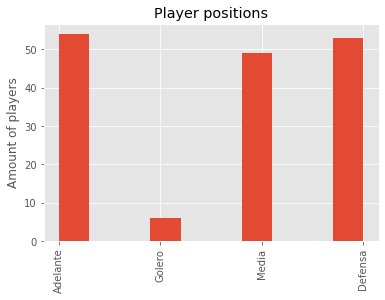

In [97]:
plt.style.use('ggplot')
plt.hist(df_futbol.Player_position_cat)
plt.xticks(rotation='vertical')
plt.title("Player positions")
plt.ylabel("Amount of players")

### 4.  Visualiza de nuevo la nueva variable, pero ahora implementa también que el color muestra la distribución de succeeded. Describe que se observa.

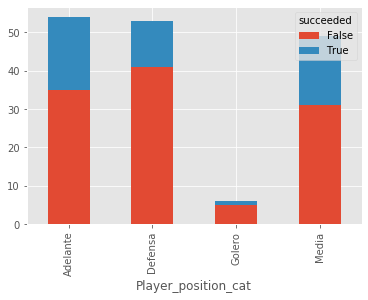

In [98]:
# En Premier League, se paga un promedio de 3.789.354 por un jugador.df2 = df_futbol.groupby(['Player_position_cat', 'succeeded'])['Player_position_cat'].count().unstack('succeeded').fillna(0)
df2.plot(kind='bar', stacked=True)

### 5. Arma otro stacked histogram, esta vez de las distintas divisiones y el color presentado las distintas posiciones.

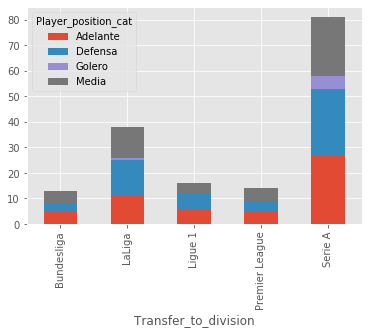

In [99]:
df2 = df_futbol.groupby(['Transfer_to_division', 'Player_position_cat'])['Transfer_to_division'].count().unstack('Player_position_cat').fillna(0)
df2.plot(kind='bar', stacked=True)

### 6. Arma un stacked area chart, para los MV_4y_high por los distintas temporadas y por división. Describe lo que se observa. 

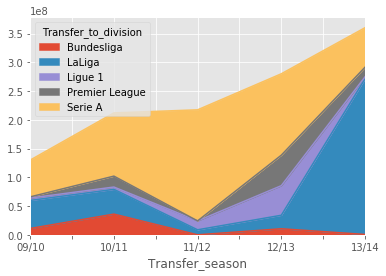

In [100]:
# En Premier League, se paga un promedio de 3.789.354 por un jugador.df2 = df_futbol.groupby(['Transfer_season', 'Transfer_to_division'])['MV_4y_high'].sum().unstack('Transfer_to_division').fillna(0)
df2.plot(kind='area', stacked=True)